In [1]:

# Importing Libraries

import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
import os
from sklearn.metrics import r2_score
from scipy import stats
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Setting working directory
os.chdir("C:/Users/jatin/Desktop/python_edwisor")

# Loading data
df = pd.read_excel("Absenteeism_at_work_Project.xls")

In [3]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [4]:
# Categorising into continuous and categorical
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

In [5]:
#Creating dataframe with missing values present in each variable

missing_val = pd.DataFrame(df.isnull().sum()).reset_index()

#Renaming variables of missing_val dataframe
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculating percentage missing value
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

# Sorting missing_val in Descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

# Saving output result into csv file
missing_val.to_csv("Missing_perc.csv", index = False)

In [6]:
# Droping observation in which "Absenteeism time in hours" has missing value

df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)
print(df.shape)
print(df['Absenteeism time in hours'].isnull().sum())

(718, 21)
0


In [7]:
# Checking for "Body mass index" column
# Actual value = 31
# Mean = 26.68
# Median = 25
# KNN = 30.99


#create missing value
df['Body mass index'].iloc[12] = np.nan

C:\Users\jatin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
#Imouting values with KNN imputation
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.685
Imputing row 101/718 with 1 missing, elapsed time: 0.806
Imputing row 201/718 with 0 missing, elapsed time: 0.813
Imputing row 301/718 with 0 missing, elapsed time: 0.817
Imputing row 401/718 with 0 missing, elapsed time: 0.819
Imputing row 501/718 with 1 missing, elapsed time: 0.823
Imputing row 601/718 with 0 missing, elapsed time: 0.825
Imputing row 701/718 with 0 missing, elapsed time: 0.828


In [9]:
df.isnull().sum().sum()

0

Text(0, 0.5, 'Values')

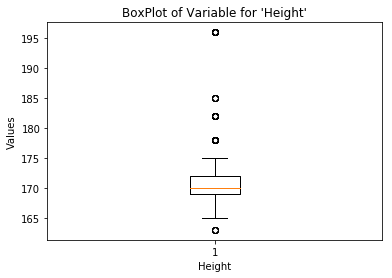

In [10]:
# Box plot for one variable and then replacing it with na

plt.boxplot(df['Height'])
plt.xlabel("Height")
plt.title("BoxPlot of Variable for 'Height'")
plt.ylabel('Values')

In [11]:
for i in continuous_vars:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


# Imputing missing values with KNN

df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
# Checking if there is any missing value
df.isnull().sum().sum()
    
    

Imputing row 1/718 with 0 missing, elapsed time: 0.168
Imputing row 101/718 with 0 missing, elapsed time: 0.170
Imputing row 201/718 with 1 missing, elapsed time: 0.171
Imputing row 301/718 with 0 missing, elapsed time: 0.175
Imputing row 401/718 with 0 missing, elapsed time: 0.176
Imputing row 501/718 with 0 missing, elapsed time: 0.178
Imputing row 601/718 with 2 missing, elapsed time: 0.179
Imputing row 701/718 with 0 missing, elapsed time: 0.181


0

[]

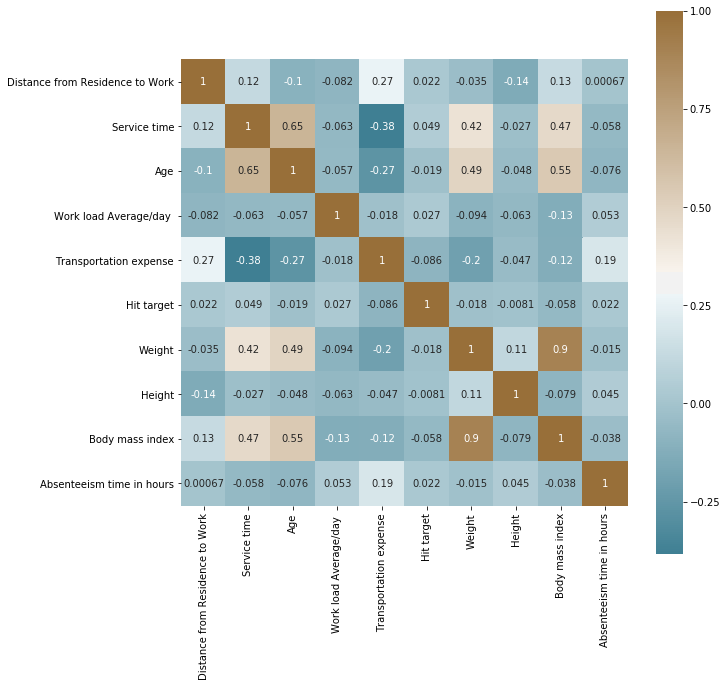

In [12]:
##Correlation analysis for continuous variables
#Correlation plot
df_corr = df.loc[:,continuous_vars]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()


In [13]:
##Correlation analysis for continuous variables
#Correlation plot
df_corr = df.loc[:,continuous_vars]

In [14]:
#loop for ANOVA test Since the target variable is continuous
for i in categorical_vars:
    f, p = stats.f_oneway(df[i], df["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable ID is 8.449881295013552e-167
P value for variable Reason for absence is 9.770767089088417e-277
P value for variable Month of absence is 3.3124782278857673e-25
P value for variable Day of the week is 0.0008188161594849071
P value for variable Seasons is 3.127506937786291e-40
P value for variable Disciplinary failure is 1.2189432024253421e-185
P value for variable Education is 8.375003325123203e-105
P value for variable Social drinker is 1.2794395762714786e-150
P value for variable Social smoker is 9.117849965003895e-184
P value for variable Pet is 5.325984030592952e-127
P value for variable Son is 9.45269711512623e-116


In [15]:
# Droping the variables which has redundant information
# Body mass index and Weight are highly correlated
# Removing one of them
df_del = "Weight"
df = df.drop(df_del,axis = 1)

In [16]:
df


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.000000,36.0,13.0,33.000000,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.000000,30.000000,4.000000
1,36.0,0.0,7.0,3.0,1.0,118.000000,13.0,18.0,50.000000,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,170.000009,31.000000,0.000000
2,3.0,23.0,7.0,4.0,1.0,179.000000,51.0,18.0,38.000000,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,170.000000,31.000000,2.000000
3,7.0,7.0,7.0,5.0,1.0,279.000000,5.0,14.0,39.000000,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,168.000000,24.000000,4.000000
4,11.0,23.0,7.0,5.0,1.0,289.000000,36.0,13.0,33.000000,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.000000,30.000000,2.000000
5,10.0,22.0,7.0,6.0,1.0,336.611690,52.0,3.0,28.000000,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,172.000000,27.000000,8.000000
6,20.0,23.0,7.0,6.0,1.0,260.000000,50.0,11.0,36.000000,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,168.000000,23.000000,4.000000
7,14.0,19.0,7.0,2.0,1.0,155.000000,12.0,14.0,34.000000,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,168.978750,25.000000,3.137931
8,1.0,22.0,7.0,2.0,1.0,235.000000,11.0,14.0,37.000000,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,172.000000,29.000000,8.000000
9,20.0,1.0,7.0,2.0,1.0,260.000000,50.0,11.0,36.000000,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,168.000000,23.000000,8.000000


In [17]:
continuous_vars = [i for i in continuous_vars if i not in df_del]


In [18]:
df_vis = df.copy()
# Saving a copy for visualizations later
# After feature selection we have feature scaling
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())
    

In [19]:
df.shape

(718, 20)

In [20]:
df.iloc[:,19]

0       4.000000
1       0.000000
2       2.000000
3       4.000000
4       2.000000
5       8.000000
6       4.000000
7       3.137931
8       8.000000
9       8.000000
10      8.000000
11      8.000000
12      1.000000
13      4.000000
14      2.000000
15      8.000000
16      8.000000
17      2.000000
18      1.000000
19      5.166941
20      4.000000
21      8.000000
22      7.000000
23      1.000000
24      4.000000
25      8.000000
26      2.000000
27      8.000000
28      8.000000
29      4.000000
         ...    
688     8.000000
689     3.000001
690     8.000000
691     2.000000
692     0.000000
693     0.000000
694     3.000000
695     2.000000
696     2.000000
697     3.000000
698     3.000000
699     8.000000
700     2.000000
701     3.000000
702     3.000000
703     4.000000
704     2.000000
705     8.000000
706     4.000000
707     7.994566
708    16.000000
709     2.000000
710     8.000000
711     8.000000
712     4.686476
713     8.000000
714     4.000000
715     0.0000

In [21]:
# Using train_test_split sampling function for test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:19],df.iloc[:,19], test_size = 0.20)


In [22]:
# Get dummy variables for categorical variables

df = pd.get_dummies(data = df, columns = categorical_vars)

# Copying dataframe
df1 = df.copy()
target = df['Absenteeism time in hours']

In [23]:
df.drop(['Absenteeism time in hours'], inplace = True, axis=1)
df

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,ID_1.0,ID_2.0,...,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_1.0000000034808583,Son_2.0,Son_2.000000090044646,Son_3.0,Son_3.9575535615568516,Son_4.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.500001,0.631579,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.500000,0.631579,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.300000,0.263158,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0.840814,1.000000,0.086957,0.038462,0.244925,0.769231,0.700000,0.421053,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0.546154,0.957447,0.434783,0.346154,0.244925,0.769231,0.300000,0.210526,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0.142308,0.148936,0.565217,0.269231,0.244925,0.769231,0.397875,0.315789,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0.450000,0.127660,0.565217,0.384615,0.244925,0.769231,0.700000,0.526316,1,0,...,0,0,0,1,0,0,0,0,0,0
9,0.546154,0.957447,0.434783,0.346154,0.244925,0.769231,0.300000,0.210526,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
# WE hve 129 predictor variables applying PCA TO reduce it

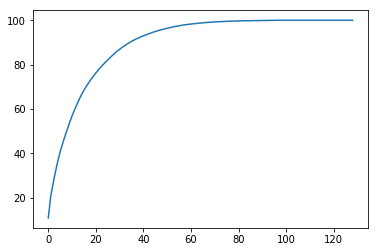

In [25]:
from sklearn.decomposition import PCA

# Converting data to numpy array
X = df.values


# Data has 129 variables so no of components of PCA = 129
pca = PCA(n_components=129)
pca.fit(X)

# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [26]:
# From the above plot selecting 50 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

# Fitting the selected components to the data
pca.fit(X)

# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2)

In [27]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 3.1162460994923844
Root Mean Squared Error For Test data = 3.1797394709292734
R^2 Score(coefficient of determination) = 0.05997620196340836


In [28]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 1.112743160159132
Root Mean Squared Error For Test data = 2.455451369666293
R^2 Score(coefficient of determination) = 0.43944472038826976


In [29]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 2.3629379044859236
Root Mean Squared Error For Test data = 152331897598.23602
R^2 Score(coefficient of determination) = -2.1574337925262703e+21


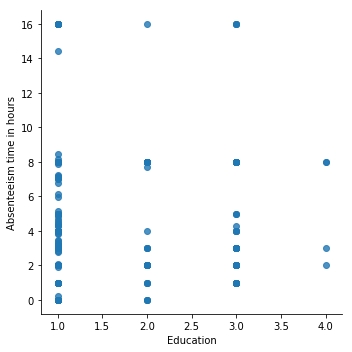

In [30]:

# Plotting visualizations in Pythin to see how data is varying with observations

vis1 = sns.lmplot(data=df_vis,x="Education",y="Absenteeism time in hours",fit_reg=False)

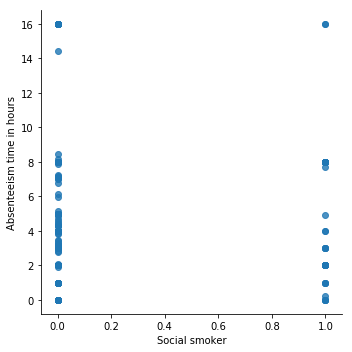

In [31]:
vis1 = sns.lmplot(data=df_vis,x="Social smoker",y="Absenteeism time in hours",fit_reg=False)

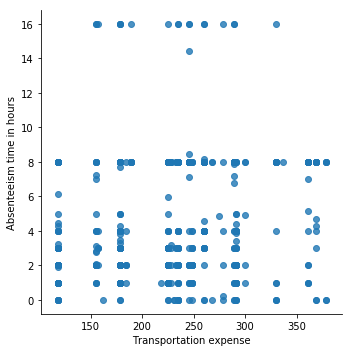

In [32]:
vis1 = sns.lmplot(data=df_vis,x="Transportation expense",y="Absenteeism time in hours",fit_reg=False)

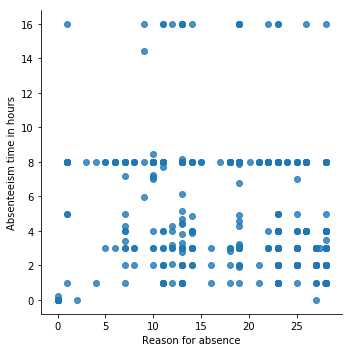

In [33]:
vis1 = sns.lmplot(data=df_vis,x="Reason for absence",y="Absenteeism time in hours",fit_reg=False)

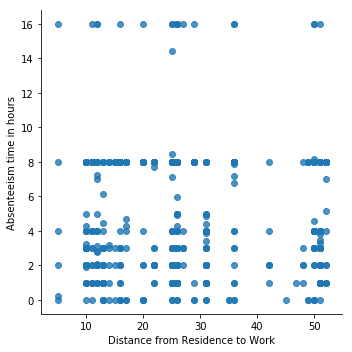

In [34]:
vis1 = sns.lmplot(data=df_vis,x="Distance from Residence to Work",y="Absenteeism time in hours",fit_reg=False)